In [1]:
## Distributed python packages
from calendar import monthrange
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
from math import radians, log

##Own librairies
from read_hs_p2l import read_WWNC, read_WWNCf
from surf_ampli import site_effect
from readWW31 import read_dpt

__author__ = "Lisa Tomasetto"
__copyright__ = "Copyright 2022, UGA"
__credits__ = ["Lisa Tomasetto"]
__version__ = "1.0"
__maintainer__ = "Lisa Tomasetto"
__email__ = "lisa.tomasetto@univ-grenoble-alpes.fr"
__status__ = "Production"

# Rayleigh Source of microseisms

This program aims at modelizing the ambient noise source in the secondary microseismic range for Rayleigh waves.
It is based on Ardhuin et al. (2011) article.
We will compute the **equivalent source for the power spectrum of the vertical displacement** $S_{DF}$, its unit is meter times seconds.
$$ S_{DF}(f_s) \approx \frac{2\pi f_s C}{\rho_s^2 \beta^5} F_{p3D}(k_2 \approx 0, f_s)$$ 
where:
- $f_s$ is the seismic frequency (twice the ocean wave frequency)
- C is the amplitude response functions for the normal modes, from Longuet-Higgins (1950). $C = \sum_{i=1}^{4} c_i^2$
- $\rho_s$ is the rock density of the crust. Here $\rho_s = 2830 kg.m^{-3}$
- $\beta$ is the shear wave velocity. Here $\beta = 2.8 km.s^{-1}$
- $F_{p3D}(k_2 \approx 0, f_s)$ the spectral density of the pressure field at the ocean surface or directional wave spectra.

In our case Rayleigh waves are dominant in the periodic band from 5s to 12s so we will integrate this over the corresponding frequency band.
$$ S_{DF} = \int_{0.083}^{0.200} S_{DF}(f)  df $$

The values of the Rayleigh waves site effect coefficient can be found in Longuet-Higgins (1950), the values are tabulated in longuet_higgins.txt file.
The $F_{p3D}$ can be retrieved using oceanic waves model resources from the Ifremer institute in Brest, France. 

References: 
* Ardhuin, F., Stutzmann, E., Schimmel, M., & Mangeney, A. (2011). Ocean wave sources of seismic noise. Journal of Geophysical Research: Oceans, 116(C9).
* Longuet-Higgins, M. S. (1950). A theory of the origin of microseisms. Philosophical Transactions of the Royal Society of London. Series A, Mathematical and Physical Sciences, 243(857), 1-35.

In [2]:
## Set font size parameters to make readable figures
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Parameters

This implementation is depending on a few parameters. Some are described above in the formula of our rayleigh wave noise source but others are for the user to choose.

The first set of parameters is the physical constants above. 
The plot variable allows you to plot monthly source or not. For particular events set to False.
Then the dates the user wants to focus on, loops on hours, days, months and years are available setting an empty bracket symbol.

Then the different paths for the bathymetry files, Longuet-Higgins values of site effect file, files from the WW3 Hindcast data wave model. 
    For the model files go to ftp://ftp.ifremer.fr/ifremer/ww3/HINDCAST/SISMO/, then choose the year(s) and month(s) corresponding files. Two files are necessary, the significant waveheight file, extension hs.nc and the directional wave spectra file, extension p2l.nc. 
Finally the user can choose the extent of the maps with minimum and maximum longitudes and latitudes.

In [3]:
##Parameters for ocean site effect maps and rayleigh noise sources

# seismic waves
vs_crust = 2.8  # km/s
rho_s = 2830  # kg/m3
f1 = 1/12  # frequency to integrate from
f2 = 1/5  # frequency to integrate to
res_mod = radians(0.5)  # angular resolution of the model
radius = 6.371*1e6
lg10 = log(10)
plot = True # plot PSD integrated over frequency

# dates
YEAR = 2020   # loop if vector
MONTH = [9]  # loop if vector
DAY =  [18] # loop if vector, compute all days of the month if empty
HOUR = []  # loop if vector

# ww3
file_bathy = "ww3.07121700.dpt"
fpath = '/Users/tomasetl/Documents/code/ocean_source/data/2020/'
# site effect
path = './longuet_higgins.txt'
# extent
lat_min = 30
lat_max = 60
lon_min = -10
lon_max = 50

## Bathymetry file 
   The bathymetry (or waterlevel) is necessary to compute the site effect for a given phase. Here we use the file "ww3.07121700.dpt" available on Ifremer ftp (ftp.ifremer.fr)
   The resolution of our maps is 0.5° in latitude and 0.5° in longitude. The dimension of dpt1 matrix should be 720x323 (longitude x latitude). For years after 2017 (included) the model format is 720x317 (longitude x latitude) the last 3° of latitude are not calculated so the dpt1 matrix shape has to be adapted.

In [4]:
[zlat, zlon, dpt1, var] = read_dpt(file_bathy) # load bathymetry file
if np.max(YEAR) > 2017:
    zlat = zlat[:-6]  # adapt format
    
## Adapt latitude and longitude to values in parameters file
ind_lat = np.squeeze(np.argwhere((zlat > lat_min)&(zlat < lat_max))) 
ind_lon = np.squeeze(np.argwhere((zlon > lon_min)&(zlon < lon_max)))
ny, nx = len(ind_lat), len(ind_lon)

## Main code

/Users/tomasetl/Documents/code/ocean_source/data/2020/WW3-GLOB-30M_202009_p2l.nc
log10(Pa2 m2 s+1E-12)
integral over frequency range f1 = 0.083, f2 = 0.200


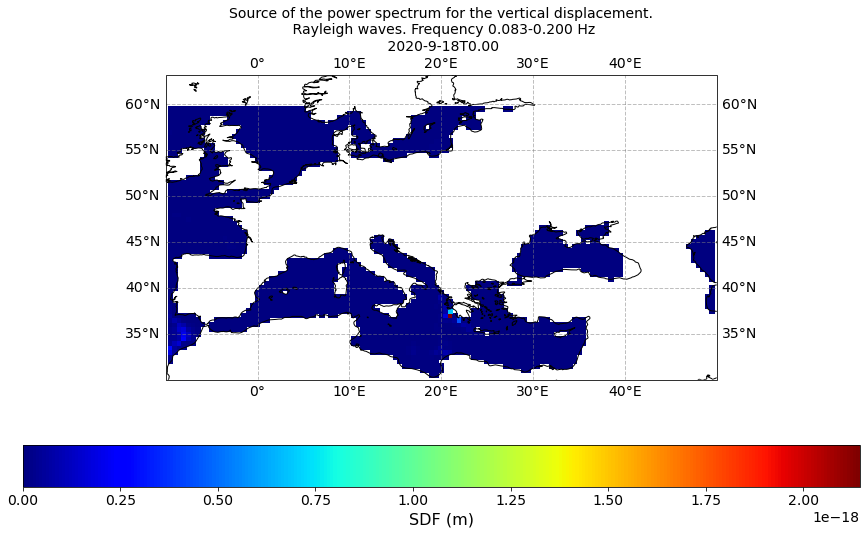

log10(Pa2 m2 s+1E-12)
integral over frequency range f1 = 0.083, f2 = 0.200


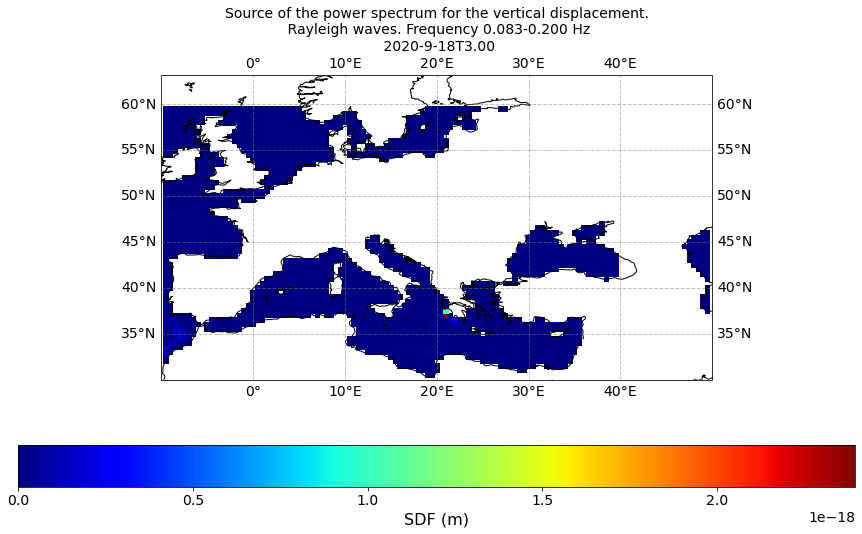

log10(Pa2 m2 s+1E-12)
integral over frequency range f1 = 0.083, f2 = 0.200


log10(Pa2 m2 s+1E-12)
integral over frequency range f1 = 0.083, f2 = 0.200


log10(Pa2 m2 s+1E-12)
integral over frequency range f1 = 0.083, f2 = 0.200


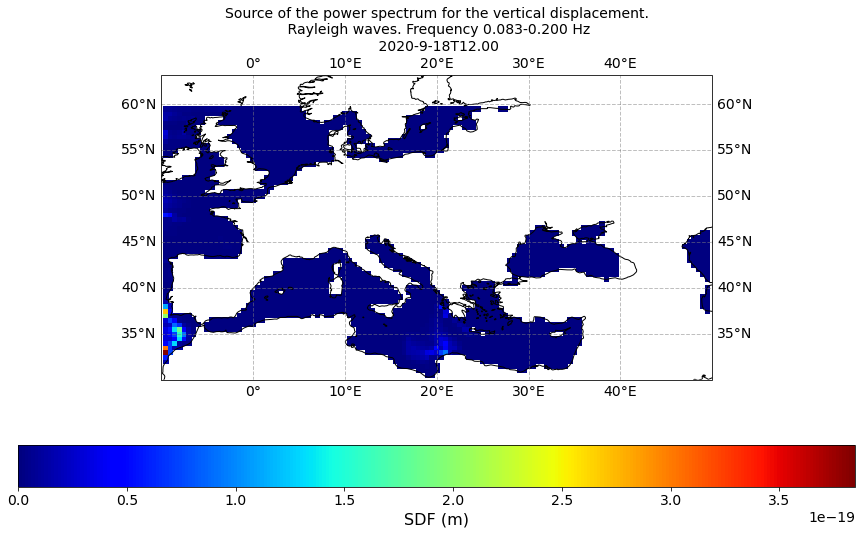

log10(Pa2 m2 s+1E-12)
integral over frequency range f1 = 0.083, f2 = 0.200


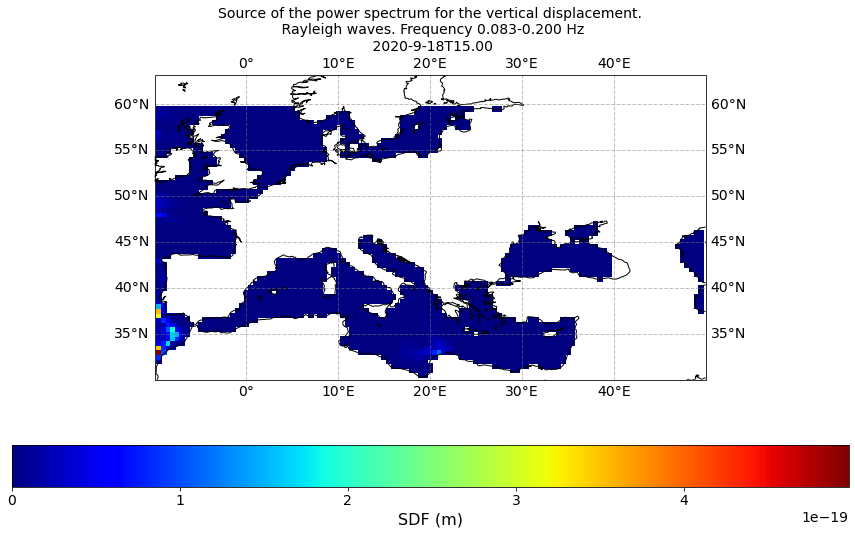

log10(Pa2 m2 s+1E-12)
integral over frequency range f1 = 0.083, f2 = 0.200


log10(Pa2 m2 s+1E-12)
integral over frequency range f1 = 0.083, f2 = 0.200


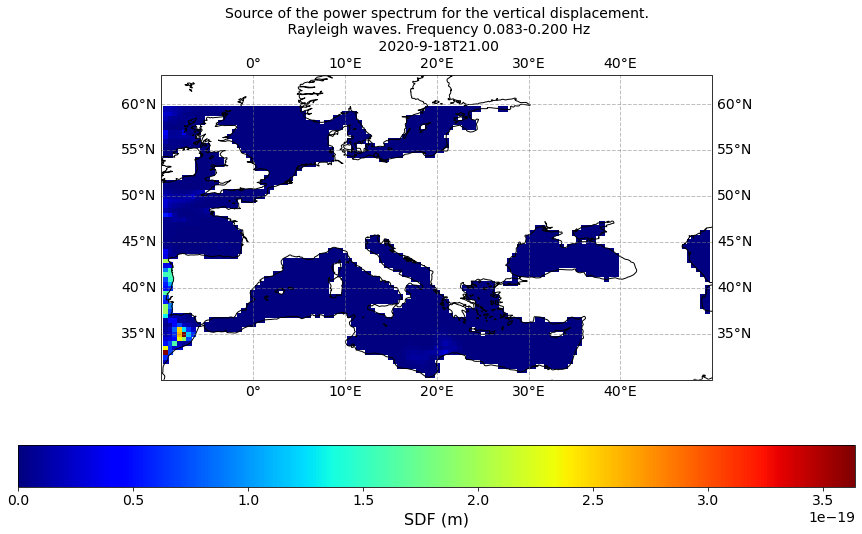

In [18]:
#TOTAL_source =  np.zeros((ny, nx))  # Source of rayleigh wave matrix

## Loop over dates
for iyear in np.array([YEAR]):
    if isinstance(MONTH, int):
        MONTH = np.array([MONTH])
    elif not len(MONTH):
        MONTH = np.arange(1, 13)
    else:
        MONTH = np.array(MONTH)
    for imonth in MONTH:
        TOTAL_month = np.zeros((ny,nx))  ## Initiate monthly source of Rayleigh wave matrix
        daymax = monthrange(iyear,imonth)[1]
        if imonth < 10:
            filepath = '%sWW3-GLOB-30M_%d0%d'%(fpath, iyear, imonth)  ## path to wave model files
        else:
            filepath = '%sWW3-GLOB-30M_%d%d'%(fpath, iyear, imonth)  ## path to wave model files
        filename_p2l = '%s_p2l.nc'%(filepath)
        print(filename_p2l)
        try:
            day = np.array(DAY)
            if day[0] > day[-1]:
                index = np.squeeze(np.argwhere(day==daymax))
                if imonth == MONTH[0]:
                    day = day[:index+1]
                elif imonth == MONTH[-1]:
                    index = np.squeeze(np.argwhere(day==monthrange(iyear, imonth-1)[1]))
                    day = day[index+1:]
                else:
                    day = np.arange(1,daymax+1)
        except:
            try:
                day = int(np.squeeze(day))
            except:
                day= np.arange(1,(monthrange(iyear,imonth)[1])+1)
        for iday in day:
            if isinstance(HOUR, int):
                HOUR = np.array([HOUR])
            elif not len(HOUR):
                HOUR = np.arange(0,24,3)
            else:
                HOUR = np.array(HOUR)
            for ih in HOUR:
                
                ## Open F_p3D 
                (lat, lon, freq, p2l, unit1, scale) = read_WWNCf(filename_p2l, [iyear, imonth, iday, ih], [], [])
                nf = len(freq)  # number of frequencies 
                xfr = np.exp(np.log(freq[-1]/freq[0])/(nf-1))  # determines the xfr geometric progression factor
                df = freq*0.5*(xfr-1/xfr)  # frequency interval in wave model times 2
                freq = 2*freq  #ocean to seismic waves freq
                
                ## Check units of the model, depends on version
                if unit1 == 'log10(Pa2 m2 s+1E-12':
                    p2l = np.exp(lg10*p2l)  - (1e-12-1e-16)
                elif unit1 == 'log10(m4s+0.01':
                    p2l = np.exp(lg10*p2l) - 0.009999
                elif unit1 == 'log10(Pa2 m2 s+1E-12)':
                    p2l = np.exp(lg10*p2l)  - (1e-12-1e-16)
                print(unit1)
                
                SDF = np.zeros(dpt1.shape)  # initiate SDF value to zero
                
                ## Integral over a frequency band
                if f1 < f2:
                    summ = np.zeros(dpt1.shape)
                    index_freq = np.squeeze(np.argwhere((f1<=freq)&(freq<=f2)))
                    df = df[index_freq]
                    freq = freq[index_freq]
                    n_freq = len(index_freq)
                    print('integral over frequency range f1 = %.3f, f2 = %.3f'%(f1, f2))
                    Fp = p2l[:, :, index_freq]
                    if YEAR > 2017:
                        Fp = Fp[:, :-6, :]
                    C = site_effect(dpt1, freq, vs_crust, path)  # computes Longuet-Higgins site effect given the bathymetry
                    M = C*Fp
                    ## Loop over frequencies of interest
                    for i, f in enumerate(freq):
                        M[:, :, i] = f*df[i]*M[:, :, i]
                    S = np.sum(M, axis=2)
                    SDF = 2*np.pi/(rho_s**2*(vs_crust*1e3)**5)*S.T
                ## Single frequency
                elif f1 == f2:
                    index_freq = np.squeeze(np.argmin(abs(freq-f1)))
                    print('unique frequency ', f1)
                    Fp = p2l[:, :, index_freq]
                    C = site_effect(dpt1, f1, vs_crust, path)
                    print(C.shape)
                    #C = C.reshape(len(dpt1), len(dpt1[0]))
                    SDF = 2*np.pi*f1/(rho_s**2*(vs_crust*1e3)**5)*Fp.T*C
                
                ## Exception in parametrization of frequencies
                else:
                    print('two frequencies with f2 < f1 were given')
                    exit()
                    
                ## Extent 
                SDF = SDF[ind_lat, :]
                SDF= SDF[:, ind_lon]
                if plot:
                    plt.figure(figsize = (15, 8))
                    ax = plt.axes(projection = ccrs.PlateCarree())
                    ax.coastlines()
                    im = ax.pcolor(zlon[ind_lon], zlat[ind_lat], SDF, shading='auto', cmap='jet')
                    ax.set_title('Source of the power spectrum for the vertical displacement.\n Rayleigh waves. Frequency %.3f-%.3f Hz\n %d-%d-%dT%.2f'%(f1, f2, iyear, imonth, iday, ih))
                    plt.colorbar(im, label = 'SDF (m)', orientation = 'horizontal', ax=ax)
                    ax.set_extent((lon_min, lon_max, lat_min, lat_max))
                    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
                plt.show()
                #plt.savefig('rayleigh_%d-%d'%(iyear, imonth))
                
                ## Monthly Source
                #TOTAL_month += SDF
        ## Yearly Source        
        #TOTAL_source += TOTAL_month

## Plot of main sources
This plot shows SDF summed over time. If it is a full year the image represents the contribution of every day at 3 a.m. to the ambient noise microseismic source.

In [ ]:
plt.figure(figsize = (15, 7))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.coastlines()
im = ax.pcolormesh(zlon[ind_lon], zlat[ind_lat], TOTAL_source, shading='auto', cmap='jet')
ax.set_title('Source of the power spectrum for the vertical displacement.\n Rayleigh waves. Frequency %.3f-%.3f Hz.'%(f1, f2))
plt.colorbar(im, label = 'SDF (m)', orientation = 'horizontal', ax=ax)
ax.set_extent((lon_min, lon_max, lat_min, lat_max))
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
plt.savefig('rayleigh_source%d.png'%(iyear))